# Library imports

In [19]:
import rasterio
from rasterio.windows import Window, get_data_window


import matplotlib.pyplot as plt
import matplotlib.colors

import numpy as np

%matplotlib notebook

In [6]:
from thresholding_watershed import itcd as itcd_tw
#from local_maxima import itcd as itcd_lm
from skimage.color import gray2rgb

from skimage.exposure import rescale_intensity

from rasterio.mask import mask
from shapely.affinity import translate,affine_transform
from shapely.geometry import mapping

# Extracting VIS features

## Loading the data

In [14]:
polys

{(0, 0): <shapely.geometry.multipolygon.MultiPolygon at 0x7f63b2c76128>,
 (0, 1): <shapely.geometry.multipolygon.MultiPolygon at 0x7f63a1b9b940>,
 (0, 2): <shapely.geometry.multipolygon.MultiPolygon at 0x7f63a1b9b9b0>,
 (0, 3): <shapely.geometry.multipolygon.MultiPolygon at 0x7f63a1b9bac8>,
 (0, 4): <shapely.geometry.multipolygon.MultiPolygon at 0x7f63a1b9bb38>,
 (0, 5): <shapely.geometry.multipolygon.MultiPolygon at 0x7f63b2c760f0>,
 (0, 6): <shapely.geometry.multipolygon.MultiPolygon at 0x7f63a1b9bba8>,
 (0, 7): <shapely.geometry.multipolygon.MultiPolygon at 0x7f63a1b9b9e8>,
 (0, 8): <shapely.geometry.multipolygon.MultiPolygon at 0x7f63a1b9bb70>,
 (0, 9): <shapely.geometry.multipolygon.MultiPolygon at 0x7f63a1b9bc18>,
 (0, 10): <shapely.geometry.multipolygon.MultiPolygon at 0x7f63a1b9bc88>,
 (0, 11): <shapely.geometry.multipolygon.MultiPolygon at 0x7f63a1b9b978>,
 (0, 12): <shapely.geometry.multipolygon.MultiPolygon at 0x7f63a1b9ba20>,
 (0, 13): <shapely.geometry.multipolygon.MultiPo

In [67]:
dataset_VIS_filename = '../DATA/Flight_01-08_OrthoVIS16_/OrthoVIS16.tif'

polys = dict()
features = dict()
        
with rasterio.open(dataset_VIS_filename) as src:
    assert len(set(src.block_shapes)) == 1
    for window_id, window in src.block_windows():
        
        trees_VIS = src.read(src.indexes, window=window)
        
        selected_band = 8

        trees_mono = trees_VIS[selected_band]

        # Scale image
        trees_mono_n = rescale_intensity(trees_mono,out_range='uint8')

        # Compute ITCD
        polys[window_id] = itcd_tw(trees_mono_n, smoothing=2, rgb=False, n_dilation=0)
        
        # Extract HSI features
        features_block = np.zeros((len(polys[window_id]),17*3))
        
        polys_t = translate(polys[window_id],xoff=256*window_id[1],yoff=256*window_id[0])
        polys_tt = affine_transform(polys_t,affine_matrix)

        for i, pol_tt in enumerate(polys_tt):
            
            tree, tree_transform = mask(src,[mapping(pol_tt)],crop=True,all_touched=True,filled=False,invert=False)

            tree_p_b = tree.reshape(tree.shape[0],-1)[:-1]

            tree_avg = np.ma.average(tree_p_b,axis=1)
            tree_min = np.ma.min(tree_p_b,axis=1)
            tree_max = np.ma.max(tree_p_b,axis=1)

            features_block[i,:] = np.hstack((tree_avg,tree_min,tree_max))
        
        features[window_id] = features_block
        
        print(f'Block: {window_id}, {len(polys[window_id])} trees found')

total_found = sum([len(poly) for block, poly in polys.items()])

/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (0, 0), 0 trees found
Block: (0, 1), 0 trees found
Block: (0, 2), 0 trees found
Block: (0, 3), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (0, 4), 0 trees found
Block: (0, 5), 0 trees found
Block: (0, 6), 0 trees found
Block: (0, 7), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (0, 8), 0 trees found
Block: (0, 9), 0 trees found
Block: (0, 10), 0 trees found
Block: (0, 11), 0 trees found
Block: (0, 12), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (0, 13), 0 trees found
Block: (0, 14), 0 trees found
Block: (0, 15), 0 trees found
Block: (0, 16), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (0, 17), 0 trees found
Block: (0, 18), 0 trees found
Block: (0, 19), 0 trees found
Block: (0, 20), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (0, 21), 0 trees found
Block: (0, 22), 0 trees found
Block: (0, 23), 0 trees found
Block: (0, 24), 0 trees found


/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/gu

Block: (0, 25), 0 trees found
Block: (0, 26), 0 trees found
Block: (0, 27), 0 trees found
Block: (0, 28), 0 trees found


/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/gu

Block: (0, 29), 0 trees found
Block: (0, 30), 0 trees found
Block: (1, 0), 0 trees found
Block: (1, 1), 0 trees found


/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/gu

Block: (1, 2), 0 trees found
Block: (1, 3), 0 trees found
Block: (1, 4), 0 trees found
Block: (1, 5), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (1, 6), 0 trees found
Block: (1, 7), 0 trees found
Block: (1, 8), 0 trees found
Block: (1, 9), 0 trees found


/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/gu

Block: (1, 10), 0 trees found
Block: (1, 11), 0 trees found
Block: (1, 12), 0 trees found
Block: (1, 13), 0 trees found


/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/gu

Block: (1, 14), 0 trees found
Block: (1, 15), 0 trees found
Block: (1, 16), 0 trees found
Block: (1, 17), 0 trees found


/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/gu

Block: (1, 18), 0 trees found
Block: (1, 19), 0 trees found
Block: (1, 20), 0 trees found
Block: (1, 21), 0 trees found
Block: (1, 22), 0 trees found


/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/gu

Block: (1, 23), 0 trees found
Block: (1, 24), 0 trees found
Block: (1, 25), 0 trees found
Block: (1, 26), 0 trees found
Block: (1, 27), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (1, 28), 0 trees found
Block: (1, 29), 0 trees found
Block: (1, 30), 0 trees found
Block: (2, 0), 0 trees found


/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/gu

Block: (2, 1), 0 trees found
Block: (2, 2), 0 trees found
Block: (2, 3), 0 trees found
Block: (2, 4), 0 trees found


/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/gu

Block: (2, 5), 0 trees found
Block: (2, 6), 0 trees found
Block: (2, 7), 0 trees found
Block: (2, 8), 0 trees found


/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/gu

Block: (2, 9), 0 trees found
Block: (2, 10), 0 trees found
Block: (2, 11), 0 trees found
Block: (2, 12), 0 trees found


/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/gu

Block: (2, 13), 0 trees found
Block: (2, 14), 0 trees found
Block: (2, 15), 0 trees found
Block: (2, 16), 0 trees found


/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/gu

Block: (2, 17), 0 trees found
Block: (2, 18), 0 trees found
Block: (2, 19), 0 trees found
Block: (2, 20), 0 trees found


/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/gu

Block: (2, 21), 0 trees found
Block: (2, 22), 0 trees found
Block: (2, 23), 0 trees found
Block: (2, 24), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (2, 25), 0 trees found
Block: (2, 26), 0 trees found
Block: (2, 27), 0 trees found
Block: (2, 28), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussia

Block: (2, 29), 0 trees found
Block: (2, 30), 0 trees found
Block: (3, 0), 0 trees found
Block: (3, 1), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (3, 2), 0 trees found
Block: (3, 3), 0 trees found
Block: (3, 4), 0 trees found
Block: (3, 5), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (3, 6), 0 trees found
Block: (3, 7), 0 trees found
Block: (3, 8), 0 trees found
Block: (3, 9), 0 trees found
Block: (3, 10), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (3, 11), 0 trees found
Block: (3, 12), 0 trees found
Block: (3, 13), 0 trees found
Block: (3, 14), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (3, 15), 0 trees found
Block: (3, 16), 0 trees found
Block: (3, 17), 0 trees found
Block: (3, 18), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (3, 19), 0 trees found
Block: (3, 20), 0 trees found
Block: (3, 21), 0 trees found
Block: (3, 22), 0 trees found
Block: (3, 23), 0 trees found


/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/gu

Block: (3, 24), 0 trees found
Block: (3, 25), 0 trees found
Block: (3, 26), 0 trees found
Block: (3, 27), 0 trees found
Block: (3, 28), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (3, 29), 0 trees found
Block: (3, 30), 0 trees found
Block: (4, 0), 0 trees found
Block: (4, 1), 0 trees found
Block: (4, 2), 0 trees found


/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/gu

Block: (4, 3), 0 trees found
Block: (4, 4), 0 trees found
Block: (4, 5), 0 trees found
Block: (4, 6), 0 trees found


/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/gu

Block: (4, 7), 0 trees found
Block: (4, 8), 0 trees found
Block: (4, 9), 0 trees found


/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)


Block: (4, 10), 1 trees found
Block: (4, 11), 0 trees found
Block: (4, 12), 0 trees found
Block: (4, 13), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (4, 14), 0 trees found
Block: (4, 15), 0 trees found
Block: (4, 16), 0 trees found
Block: (4, 17), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (4, 18), 0 trees found
Block: (4, 19), 0 trees found
Block: (4, 20), 0 trees found
Block: (4, 21), 0 trees found
Block: (4, 22), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (4, 23), 0 trees found
Block: (4, 24), 0 trees found
Block: (4, 25), 0 trees found
Block: (4, 26), 0 trees found
Block: (4, 27), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (4, 28), 0 trees found
Block: (4, 29), 0 trees found
Block: (4, 30), 0 trees found
Block: (5, 0), 0 trees found
Block: (5, 1), 0 trees found


/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/gu

Block: (5, 2), 0 trees found
Block: (5, 3), 0 trees found
Block: (5, 4), 0 trees found
Block: (5, 5), 0 trees found
Block: (5, 6), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (5, 7), 0 trees found
Block: (5, 8), 0 trees found
Block: (5, 9), 0 trees found
Block: (5, 10), 8 trees found
Block: (5, 11), 9 trees found
Block: (5, 12), 10 trees found
Block: (5, 13), 5 trees found
Block: (5, 14), 1 trees found
Block: (5, 15), 0 trees found
Block: (5, 16), 0 trees found
Block: (5, 17), 0 trees found
Block: (5, 18), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (5, 19), 0 trees found
Block: (5, 20), 0 trees found
Block: (5, 21), 0 trees found
Block: (5, 22), 0 trees found
Block: (5, 23), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (5, 24), 0 trees found
Block: (5, 25), 0 trees found
Block: (5, 26), 0 trees found
Block: (5, 27), 0 trees found
Block: (5, 28), 0 trees found


/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (5, 29), 0 trees found
Block: (5, 30), 0 trees found
Block: (6, 0), 0 trees found
Block: (6, 1), 0 trees found
Block: (6, 2), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (6, 3), 0 trees found
Block: (6, 4), 0 trees found
Block: (6, 5), 0 trees found
Block: (6, 6), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (6, 7), 0 trees found
Block: (6, 8), 0 trees found
Block: (6, 9), 0 trees found
Block: (6, 10), 5 trees found
Block: (6, 11), 333 trees found
Block: (6, 12), 270 trees found
Block: (6, 13), 234 trees found
Block: (6, 14), 36 trees found
Block: (6, 15), 1 trees found
Block: (6, 16), 4 trees found
Block: (6, 17), 0 trees found
Block: (6, 18), 0 trees found
Block: (6, 19), 0 trees found
Block: (6, 20), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (6, 21), 0 trees found
Block: (6, 22), 0 trees found
Block: (6, 23), 0 trees found
Block: (6, 24), 0 trees found


/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/gu

Block: (6, 25), 0 trees found
Block: (6, 26), 0 trees found
Block: (6, 27), 0 trees found
Block: (6, 28), 0 trees found


/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (6, 29), 0 trees found
Block: (6, 30), 0 trees found
Block: (7, 0), 0 trees found
Block: (7, 1), 0 trees found
Block: (7, 2), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (7, 3), 0 trees found
Block: (7, 4), 0 trees found
Block: (7, 5), 0 trees found
Block: (7, 6), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)


Block: (7, 7), 0 trees found
Block: (7, 8), 0 trees found
Block: (7, 9), 1 trees found
Block: (7, 10), 110 trees found
Block: (7, 11), 273 trees found
Block: (7, 12), 255 trees found
Block: (7, 13), 227 trees found
Block: (7, 14), 248 trees found
Block: (7, 15), 268 trees found
Block: (7, 16), 279 trees found
Block: (7, 17), 41 trees found
Block: (7, 18), 9 trees found
Block: (7, 19), 11 trees found
Block: (7, 20), 4 trees found
Block: (7, 21), 5 trees found
Block: (7, 22), 0 trees found
Block: (7, 23), 0 trees found
Block: (7, 24), 0 trees found
Block: (7, 25), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (7, 26), 0 trees found
Block: (7, 27), 0 trees found
Block: (7, 28), 0 trees found
Block: (7, 29), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussia

Block: (7, 30), 0 trees found
Block: (8, 0), 0 trees found
Block: (8, 1), 0 trees found
Block: (8, 2), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (8, 3), 0 trees found
Block: (8, 4), 0 trees found
Block: (8, 5), 0 trees found
Block: (8, 6), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)


Block: (8, 7), 0 trees found
Block: (8, 8), 0 trees found
Block: (8, 9), 4 trees found
Block: (8, 10), 244 trees found
Block: (8, 11), 269 trees found
Block: (8, 12), 252 trees found
Block: (8, 13), 245 trees found
Block: (8, 14), 248 trees found
Block: (8, 15), 277 trees found
Block: (8, 16), 339 trees found
Block: (8, 17), 364 trees found
Block: (8, 18), 404 trees found
Block: (8, 19), 395 trees found
Block: (8, 20), 404 trees found
Block: (8, 21), 5 trees found
Block: (8, 22), 7 trees found
Block: (8, 23), 7 trees found
Block: (8, 24), 0 trees found
Block: (8, 25), 0 trees found
Block: (8, 26), 0 trees found
Block: (8, 27), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (8, 28), 0 trees found
Block: (8, 29), 0 trees found
Block: (8, 30), 0 trees found
Block: (9, 0), 0 trees found


/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/gu

Block: (9, 1), 0 trees found
Block: (9, 2), 0 trees found
Block: (9, 3), 0 trees found
Block: (9, 4), 0 trees found


/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/gu

Block: (9, 5), 0 trees found
Block: (9, 6), 0 trees found
Block: (9, 7), 0 trees found
Block: (9, 8), 0 trees found
Block: (9, 9), 6 trees found
Block: (9, 10), 230 trees found
Block: (9, 11), 232 trees found
Block: (9, 12), 237 trees found
Block: (9, 13), 247 trees found
Block: (9, 14), 268 trees found
Block: (9, 15), 235 trees found
Block: (9, 16), 234 trees found
Block: (9, 17), 322 trees found
Block: (9, 18), 460 trees found
Block: (9, 19), 403 trees found
Block: (9, 20), 339 trees found
Block: (9, 21), 363 trees found
Block: (9, 22), 349 trees found
Block: (9, 23), 308 trees found
Block: (9, 24), 6 trees found
Block: (9, 25), 0 trees found
Block: (9, 26), 0 trees found
Block: (9, 27), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (9, 28), 0 trees found
Block: (9, 29), 0 trees found
Block: (9, 30), 0 trees found
Block: (10, 0), 0 trees found
Block: (10, 1), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussia

Block: (10, 2), 0 trees found
Block: (10, 3), 0 trees found
Block: (10, 4), 0 trees found
Block: (10, 5), 0 trees found
Block: (10, 6), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)


Block: (10, 7), 0 trees found
Block: (10, 8), 4 trees found
Block: (10, 9), 237 trees found
Block: (10, 10), 253 trees found
Block: (10, 11), 341 trees found
Block: (10, 12), 245 trees found
Block: (10, 13), 218 trees found
Block: (10, 14), 258 trees found
Block: (10, 15), 247 trees found
Block: (10, 16), 244 trees found
Block: (10, 17), 333 trees found
Block: (10, 18), 353 trees found
Block: (10, 19), 410 trees found
Block: (10, 20), 281 trees found
Block: (10, 21), 470 trees found
Block: (10, 22), 405 trees found
Block: (10, 23), 412 trees found
Block: (10, 24), 6 trees found
Block: (10, 25), 0 trees found
Block: (10, 26), 0 trees found
Block: (10, 27), 0 trees found
Block: (10, 28), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (10, 29), 0 trees found
Block: (10, 30), 0 trees found
Block: (11, 0), 0 trees found
Block: (11, 1), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (11, 2), 0 trees found
Block: (11, 3), 0 trees found
Block: (11, 4), 0 trees found
Block: (11, 5), 0 trees found


/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)


Block: (11, 6), 0 trees found
Block: (11, 7), 0 trees found
Block: (11, 8), 33 trees found
Block: (11, 9), 253 trees found
Block: (11, 10), 222 trees found
Block: (11, 11), 338 trees found
Block: (11, 12), 309 trees found
Block: (11, 13), 295 trees found
Block: (11, 14), 259 trees found
Block: (11, 15), 217 trees found
Block: (11, 16), 266 trees found
Block: (11, 17), 301 trees found
Block: (11, 18), 304 trees found
Block: (11, 19), 313 trees found
Block: (11, 20), 301 trees found
Block: (11, 21), 417 trees found
Block: (11, 22), 439 trees found
Block: (11, 23), 177 trees found
Block: (11, 24), 3 trees found
Block: (11, 25), 0 trees found
Block: (11, 26), 0 trees found
Block: (11, 27), 0 trees found
Block: (11, 28), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (11, 29), 0 trees found
Block: (11, 30), 0 trees found
Block: (12, 0), 0 trees found
Block: (12, 1), 0 trees found
Block: (12, 2), 0 trees found


/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/gu

Block: (12, 3), 0 trees found
Block: (12, 4), 0 trees found
Block: (12, 5), 0 trees found
Block: (12, 6), 0 trees found
Block: (12, 7), 2 trees found
Block: (12, 8), 251 trees found
Block: (12, 9), 289 trees found
Block: (12, 10), 247 trees found
Block: (12, 11), 271 trees found
Block: (12, 12), 302 trees found
Block: (12, 13), 404 trees found
Block: (12, 14), 364 trees found
Block: (12, 15), 265 trees found
Block: (12, 16), 260 trees found
Block: (12, 17), 270 trees found
Block: (12, 18), 265 trees found
Block: (12, 19), 241 trees found
Block: (12, 20), 268 trees found
Block: (12, 21), 258 trees found
Block: (12, 22), 269 trees found
Block: (12, 23), 7 trees found
Block: (12, 24), 0 trees found
Block: (12, 25), 0 trees found
Block: (12, 26), 0 trees found
Block: (12, 27), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (12, 28), 0 trees found
Block: (12, 29), 0 trees found
Block: (12, 30), 0 trees found
Block: (13, 0), 0 trees found
Block: (13, 1), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (13, 2), 0 trees found
Block: (13, 3), 0 trees found
Block: (13, 4), 0 trees found
Block: (13, 5), 0 trees found
Block: (13, 6), 0 trees found


/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)


Block: (13, 7), 6 trees found
Block: (13, 8), 272 trees found
Block: (13, 9), 273 trees found
Block: (13, 10), 268 trees found
Block: (13, 11), 261 trees found
Block: (13, 12), 330 trees found
Block: (13, 13), 315 trees found
Block: (13, 14), 433 trees found
Block: (13, 15), 381 trees found
Block: (13, 16), 277 trees found
Block: (13, 17), 243 trees found
Block: (13, 18), 234 trees found
Block: (13, 19), 280 trees found
Block: (13, 20), 322 trees found
Block: (13, 21), 278 trees found
Block: (13, 22), 141 trees found
Block: (13, 23), 7 trees found
Block: (13, 24), 0 trees found
Block: (13, 25), 0 trees found
Block: (13, 26), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (13, 27), 0 trees found
Block: (13, 28), 0 trees found
Block: (13, 29), 0 trees found
Block: (13, 30), 0 trees found
Block: (14, 0), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (14, 1), 0 trees found
Block: (14, 2), 0 trees found
Block: (14, 3), 0 trees found
Block: (14, 4), 0 trees found
Block: (14, 5), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)


Block: (14, 6), 0 trees found
Block: (14, 7), 36 trees found
Block: (14, 8), 253 trees found
Block: (14, 9), 272 trees found
Block: (14, 10), 255 trees found
Block: (14, 11), 248 trees found
Block: (14, 12), 259 trees found
Block: (14, 13), 284 trees found
Block: (14, 14), 440 trees found
Block: (14, 15), 429 trees found
Block: (14, 16), 320 trees found
Block: (14, 17), 230 trees found
Block: (14, 18), 232 trees found
Block: (14, 19), 236 trees found
Block: (14, 20), 264 trees found
Block: (14, 21), 243 trees found
Block: (14, 22), 9 trees found
Block: (14, 23), 0 trees found
Block: (14, 24), 0 trees found
Block: (14, 25), 0 trees found
Block: (14, 26), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (14, 27), 0 trees found
Block: (14, 28), 0 trees found
Block: (14, 29), 0 trees found
Block: (14, 30), 0 trees found
Block: (15, 0), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (15, 1), 0 trees found
Block: (15, 2), 0 trees found
Block: (15, 3), 0 trees found
Block: (15, 4), 0 trees found
Block: (15, 5), 0 trees found


/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)


Block: (15, 6), 4 trees found
Block: (15, 7), 248 trees found
Block: (15, 8), 262 trees found
Block: (15, 9), 240 trees found
Block: (15, 10), 260 trees found
Block: (15, 11), 240 trees found
Block: (15, 12), 299 trees found
Block: (15, 13), 265 trees found
Block: (15, 14), 428 trees found
Block: (15, 15), 474 trees found
Block: (15, 16), 319 trees found
Block: (15, 17), 235 trees found
Block: (15, 18), 278 trees found
Block: (15, 19), 246 trees found
Block: (15, 20), 242 trees found
Block: (15, 21), 280 trees found
Block: (15, 22), 7 trees found
Block: (15, 23), 0 trees found
Block: (15, 24), 0 trees found
Block: (15, 25), 0 trees found
Block: (15, 26), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (15, 27), 0 trees found
Block: (15, 28), 0 trees found
Block: (15, 29), 0 trees found
Block: (15, 30), 0 trees found
Block: (16, 0), 0 trees found
Block: (16, 1), 0 trees found
Block: (16, 2), 0 trees found
Block: (16, 3), 0 trees found
Block: (16, 4), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (16, 5), 0 trees found
Block: (16, 6), 3 trees found
Block: (16, 7), 278 trees found
Block: (16, 8), 250 trees found
Block: (16, 9), 277 trees found
Block: (16, 10), 258 trees found
Block: (16, 11), 291 trees found
Block: (16, 12), 315 trees found
Block: (16, 13), 281 trees found
Block: (16, 14), 315 trees found
Block: (16, 15), 374 trees found
Block: (16, 16), 327 trees found
Block: (16, 17), 267 trees found
Block: (16, 18), 327 trees found
Block: (16, 19), 288 trees found
Block: (16, 20), 252 trees found
Block: (16, 21), 259 trees found
Block: (16, 22), 4 trees found
Block: (16, 23), 0 trees found
Block: (16, 24), 0 trees found
Block: (16, 25), 0 trees found
Block: (16, 26), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (16, 27), 0 trees found
Block: (16, 28), 0 trees found
Block: (16, 29), 0 trees found
Block: (16, 30), 0 trees found
Block: (17, 0), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (17, 1), 0 trees found
Block: (17, 2), 0 trees found
Block: (17, 3), 0 trees found
Block: (17, 4), 0 trees found
Block: (17, 5), 2 trees found
Block: (17, 6), 4 trees found
Block: (17, 7), 276 trees found
Block: (17, 8), 284 trees found
Block: (17, 9), 226 trees found
Block: (17, 10), 249 trees found
Block: (17, 11), 247 trees found
Block: (17, 12), 308 trees found
Block: (17, 13), 306 trees found
Block: (17, 14), 310 trees found
Block: (17, 15), 369 trees found
Block: (17, 16), 300 trees found
Block: (17, 17), 253 trees found
Block: (17, 18), 281 trees found
Block: (17, 19), 283 trees found
Block: (17, 20), 234 trees found
Block: (17, 21), 203 trees found
Block: (17, 22), 4 trees found
Block: (17, 23), 0 trees found
Block: (17, 24), 0 trees found
Block: (17, 25), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (17, 26), 0 trees found
Block: (17, 27), 0 trees found
Block: (17, 28), 0 trees found
Block: (17, 29), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (17, 30), 0 trees found
Block: (18, 0), 0 trees found
Block: (18, 1), 0 trees found
Block: (18, 2), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (18, 3), 0 trees found
Block: (18, 4), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)


Block: (18, 5), 11 trees found
Block: (18, 6), 245 trees found
Block: (18, 7), 263 trees found
Block: (18, 8), 312 trees found
Block: (18, 9), 256 trees found
Block: (18, 10), 265 trees found
Block: (18, 11), 272 trees found
Block: (18, 12), 268 trees found
Block: (18, 13), 313 trees found
Block: (18, 14), 281 trees found
Block: (18, 15), 383 trees found
Block: (18, 16), 263 trees found
Block: (18, 17), 211 trees found
Block: (18, 18), 240 trees found
Block: (18, 19), 218 trees found
Block: (18, 20), 222 trees found
Block: (18, 21), 6 trees found
Block: (18, 22), 0 trees found
Block: (18, 23), 0 trees found
Block: (18, 24), 0 trees found
Block: (18, 25), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (18, 26), 0 trees found
Block: (18, 27), 0 trees found
Block: (18, 28), 0 trees found
Block: (18, 29), 0 trees found
Block: (18, 30), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (19, 0), 0 trees found
Block: (19, 1), 0 trees found
Block: (19, 2), 0 trees found
Block: (19, 3), 0 trees found
Block: (19, 4), 0 trees found


/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)


Block: (19, 5), 9 trees found
Block: (19, 6), 195 trees found
Block: (19, 7), 276 trees found
Block: (19, 8), 277 trees found
Block: (19, 9), 274 trees found
Block: (19, 10), 240 trees found
Block: (19, 11), 286 trees found
Block: (19, 12), 301 trees found
Block: (19, 13), 294 trees found
Block: (19, 14), 315 trees found
Block: (19, 15), 377 trees found
Block: (19, 16), 282 trees found
Block: (19, 17), 233 trees found
Block: (19, 18), 248 trees found
Block: (19, 19), 219 trees found
Block: (19, 20), 210 trees found
Block: (19, 21), 6 trees found
Block: (19, 22), 0 trees found
Block: (19, 23), 0 trees found
Block: (19, 24), 0 trees found
Block: (19, 25), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (19, 26), 0 trees found
Block: (19, 27), 0 trees found
Block: (19, 28), 0 trees found
Block: (19, 29), 0 trees found
Block: (19, 30), 0 trees found
Block: (20, 0), 0 trees found
Block: (20, 1), 0 trees found
Block: (20, 2), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (20, 3), 0 trees found
Block: (20, 4), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)


Block: (20, 5), 8 trees found
Block: (20, 6), 235 trees found
Block: (20, 7), 240 trees found
Block: (20, 8), 266 trees found
Block: (20, 9), 313 trees found
Block: (20, 10), 258 trees found
Block: (20, 11), 265 trees found
Block: (20, 12), 261 trees found
Block: (20, 13), 269 trees found
Block: (20, 14), 316 trees found
Block: (20, 15), 294 trees found
Block: (20, 16), 230 trees found
Block: (20, 17), 301 trees found
Block: (20, 18), 286 trees found
Block: (20, 19), 241 trees found
Block: (20, 20), 166 trees found
Block: (20, 21), 3 trees found
Block: (20, 22), 0 trees found
Block: (20, 23), 0 trees found
Block: (20, 24), 0 trees found
Block: (20, 25), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (20, 26), 0 trees found
Block: (20, 27), 0 trees found
Block: (20, 28), 0 trees found
Block: (20, 29), 0 trees found
Block: (20, 30), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (21, 0), 0 trees found
Block: (21, 1), 0 trees found
Block: (21, 2), 0 trees found
Block: (21, 3), 0 trees found
Block: (21, 4), 0 trees found


/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)


Block: (21, 5), 2 trees found
Block: (21, 6), 11 trees found
Block: (21, 7), 276 trees found
Block: (21, 8), 274 trees found
Block: (21, 9), 274 trees found
Block: (21, 10), 276 trees found
Block: (21, 11), 279 trees found
Block: (21, 12), 262 trees found
Block: (21, 13), 266 trees found
Block: (21, 14), 250 trees found
Block: (21, 15), 254 trees found
Block: (21, 16), 273 trees found
Block: (21, 17), 307 trees found
Block: (21, 18), 302 trees found
Block: (21, 19), 346 trees found
Block: (21, 20), 10 trees found
Block: (21, 21), 0 trees found
Block: (21, 22), 0 trees found
Block: (21, 23), 0 trees found
Block: (21, 24), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (21, 25), 0 trees found
Block: (21, 26), 0 trees found
Block: (21, 27), 0 trees found
Block: (21, 28), 0 trees found
Block: (21, 29), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussia

Block: (21, 30), 0 trees found
Block: (22, 0), 0 trees found
Block: (22, 1), 0 trees found
Block: (22, 2), 0 trees found
Block: (22, 3), 0 trees found


/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)


Block: (22, 4), 0 trees found
Block: (22, 5), 0 trees found
Block: (22, 6), 7 trees found
Block: (22, 7), 311 trees found
Block: (22, 8), 298 trees found
Block: (22, 9), 242 trees found
Block: (22, 10), 11 trees found
Block: (22, 11), 214 trees found
Block: (22, 12), 362 trees found
Block: (22, 13), 333 trees found
Block: (22, 14), 259 trees found
Block: (22, 15), 265 trees found
Block: (22, 16), 325 trees found
Block: (22, 17), 383 trees found
Block: (22, 18), 316 trees found
Block: (22, 19), 259 trees found
Block: (22, 20), 6 trees found
Block: (22, 21), 0 trees found
Block: (22, 22), 0 trees found
Block: (22, 23), 0 trees found
Block: (22, 24), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (22, 25), 0 trees found
Block: (22, 26), 0 trees found
Block: (22, 27), 0 trees found
Block: (22, 28), 0 trees found
Block: (22, 29), 0 trees found
Block: (22, 30), 0 trees found
Block: (23, 0), 0 trees found
Block: (23, 1), 0 trees found
Block: (23, 2), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussia

Block: (23, 3), 0 trees found
Block: (23, 4), 0 trees found
Block: (23, 5), 0 trees found
Block: (23, 6), 0 trees found
Block: (23, 7), 8 trees found
Block: (23, 8), 10 trees found
Block: (23, 9), 8 trees found
Block: (23, 10), 11 trees found
Block: (23, 11), 31 trees found
Block: (23, 12), 395 trees found
Block: (23, 13), 338 trees found
Block: (23, 14), 302 trees found
Block: (23, 15), 265 trees found
Block: (23, 16), 312 trees found
Block: (23, 17), 401 trees found
Block: (23, 18), 347 trees found
Block: (23, 19), 117 trees found
Block: (23, 20), 7 trees found
Block: (23, 21), 0 trees found
Block: (23, 22), 0 trees found
Block: (23, 23), 0 trees found
Block: (23, 24), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (23, 25), 0 trees found
Block: (23, 26), 0 trees found
Block: (23, 27), 0 trees found
Block: (23, 28), 0 trees found
Block: (23, 29), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussia

Block: (23, 30), 0 trees found
Block: (24, 0), 0 trees found
Block: (24, 1), 0 trees found
Block: (24, 2), 0 trees found


/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/gu

Block: (24, 3), 0 trees found
Block: (24, 4), 0 trees found
Block: (24, 5), 0 trees found
Block: (24, 6), 0 trees found
Block: (24, 7), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)


Block: (24, 8), 0 trees found
Block: (24, 9), 1 trees found
Block: (24, 10), 1 trees found
Block: (24, 11), 9 trees found
Block: (24, 12), 130 trees found
Block: (24, 13), 344 trees found
Block: (24, 14), 320 trees found
Block: (24, 15), 251 trees found
Block: (24, 16), 56 trees found
Block: (24, 17), 325 trees found
Block: (24, 18), 311 trees found
Block: (24, 19), 5 trees found
Block: (24, 20), 0 trees found
Block: (24, 21), 0 trees found
Block: (24, 22), 0 trees found
Block: (24, 23), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (24, 24), 0 trees found
Block: (24, 25), 0 trees found
Block: (24, 26), 0 trees found
Block: (24, 27), 0 trees found
Block: (24, 28), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussia

Block: (24, 29), 0 trees found
Block: (24, 30), 0 trees found
Block: (25, 0), 0 trees found
Block: (25, 1), 0 trees found
Block: (25, 2), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (25, 3), 0 trees found
Block: (25, 4), 0 trees found
Block: (25, 5), 0 trees found
Block: (25, 6), 0 trees found
Block: (25, 7), 0 trees found


/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/gu

Block: (25, 8), 0 trees found
Block: (25, 9), 0 trees found
Block: (25, 10), 0 trees found
Block: (25, 11), 0 trees found
Block: (25, 12), 1 trees found
Block: (25, 13), 7 trees found
Block: (25, 14), 16 trees found
Block: (25, 15), 10 trees found
Block: (25, 16), 9 trees found
Block: (25, 17), 325 trees found
Block: (25, 18), 329 trees found
Block: (25, 19), 5 trees found
Block: (25, 20), 0 trees found
Block: (25, 21), 0 trees found
Block: (25, 22), 0 trees found
Block: (25, 23), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (25, 24), 0 trees found
Block: (25, 25), 0 trees found
Block: (25, 26), 0 trees found
Block: (25, 27), 0 trees found
Block: (25, 28), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussia

Block: (25, 29), 0 trees found
Block: (25, 30), 0 trees found
Block: (26, 0), 0 trees found
Block: (26, 1), 0 trees found
Block: (26, 2), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (26, 3), 0 trees found
Block: (26, 4), 0 trees found
Block: (26, 5), 0 trees found
Block: (26, 6), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (26, 7), 0 trees found
Block: (26, 8), 0 trees found
Block: (26, 9), 0 trees found
Block: (26, 10), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (26, 11), 0 trees found
Block: (26, 12), 0 trees found
Block: (26, 13), 0 trees found
Block: (26, 14), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)


Block: (26, 15), 0 trees found
Block: (26, 16), 5 trees found
Block: (26, 17), 3 trees found
Block: (26, 18), 6 trees found
Block: (26, 19), 3 trees found
Block: (26, 20), 0 trees found
Block: (26, 21), 0 trees found
Block: (26, 22), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (26, 23), 0 trees found
Block: (26, 24), 0 trees found
Block: (26, 25), 0 trees found
Block: (26, 26), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (26, 27), 0 trees found
Block: (26, 28), 0 trees found
Block: (26, 29), 0 trees found
Block: (26, 30), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (27, 0), 0 trees found
Block: (27, 1), 0 trees found
Block: (27, 2), 0 trees found
Block: (27, 3), 0 trees found
Block: (27, 4), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (27, 5), 0 trees found
Block: (27, 6), 0 trees found
Block: (27, 7), 0 trees found
Block: (27, 8), 0 trees found
Block: (27, 9), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (27, 10), 0 trees found
Block: (27, 11), 0 trees found
Block: (27, 12), 0 trees found
Block: (27, 13), 0 trees found


/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/gu

Block: (27, 14), 0 trees found
Block: (27, 15), 0 trees found
Block: (27, 16), 0 trees found
Block: (27, 17), 0 trees found
Block: (27, 18), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (27, 19), 0 trees found
Block: (27, 20), 0 trees found
Block: (27, 21), 0 trees found
Block: (27, 22), 0 trees found
Block: (27, 23), 0 trees found


/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/gu

Block: (27, 24), 0 trees found
Block: (27, 25), 0 trees found
Block: (27, 26), 0 trees found
Block: (27, 27), 0 trees found
Block: (27, 28), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (27, 29), 0 trees found
Block: (27, 30), 0 trees found
Block: (28, 0), 0 trees found
Block: (28, 1), 0 trees found
Block: (28, 2), 0 trees found


/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/gu

Block: (28, 3), 0 trees found
Block: (28, 4), 0 trees found
Block: (28, 5), 0 trees found
Block: (28, 6), 0 trees found
Block: (28, 7), 0 trees found


/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/gu

Block: (28, 8), 0 trees found
Block: (28, 9), 0 trees found
Block: (28, 10), 0 trees found
Block: (28, 11), 0 trees found
Block: (28, 12), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (28, 13), 0 trees found
Block: (28, 14), 0 trees found
Block: (28, 15), 0 trees found
Block: (28, 16), 0 trees found
Block: (28, 17), 0 trees found


/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/gu

Block: (28, 18), 0 trees found
Block: (28, 19), 0 trees found
Block: (28, 20), 0 trees found
Block: (28, 21), 0 trees found
Block: (28, 22), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (28, 23), 0 trees found
Block: (28, 24), 0 trees found
Block: (28, 25), 0 trees found
Block: (28, 26), 0 trees found


/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/gu

Block: (28, 27), 0 trees found
Block: (28, 28), 0 trees found
Block: (28, 29), 0 trees found
Block: (28, 30), 0 trees found


/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/gu

Block: (29, 0), 0 trees found
Block: (29, 1), 0 trees found
Block: (29, 2), 0 trees found
Block: (29, 3), 0 trees found
Block: (29, 4), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (29, 5), 0 trees found
Block: (29, 6), 0 trees found
Block: (29, 7), 0 trees found
Block: (29, 8), 0 trees found
Block: (29, 9), 0 trees found


/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/gu

Block: (29, 10), 0 trees found
Block: (29, 11), 0 trees found
Block: (29, 12), 0 trees found
Block: (29, 13), 0 trees found
Block: (29, 14), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (29, 15), 0 trees found
Block: (29, 16), 0 trees found
Block: (29, 17), 0 trees found
Block: (29, 18), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (29, 19), 0 trees found
Block: (29, 20), 0 trees found
Block: (29, 21), 0 trees found
Block: (29, 22), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (29, 23), 0 trees found
Block: (29, 24), 0 trees found
Block: (29, 25), 0 trees found
Block: (29, 26), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (29, 27), 0 trees found
Block: (29, 28), 0 trees found
Block: (29, 29), 0 trees found
Block: (29, 30), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussia

Block: (30, 0), 0 trees found
Block: (30, 1), 0 trees found
Block: (30, 2), 0 trees found
Block: (30, 3), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (30, 4), 0 trees found
Block: (30, 5), 0 trees found
Block: (30, 6), 0 trees found
Block: (30, 7), 0 trees found


/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/gu

Block: (30, 8), 0 trees found
Block: (30, 9), 0 trees found
Block: (30, 10), 0 trees found
Block: (30, 11), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (30, 12), 0 trees found
Block: (30, 13), 0 trees found
Block: (30, 14), 0 trees found
Block: (30, 15), 0 trees found
Block: (30, 16), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (30, 17), 0 trees found
Block: (30, 18), 0 trees found
Block: (30, 19), 0 trees found
Block: (30, 20), 0 trees found
Block: (30, 21), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (30, 22), 0 trees found
Block: (30, 23), 0 trees found
Block: (30, 24), 0 trees found
Block: (30, 25), 0 trees found
Block: (30, 26), 0 trees found


/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/gu

Block: (30, 27), 0 trees found
Block: (30, 28), 0 trees found
Block: (30, 29), 0 trees found
Block: (30, 30), 0 trees found
Block: (31, 0), 0 trees found
Block: (31, 1), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (31, 2), 0 trees found
Block: (31, 3), 0 trees found
Block: (31, 4), 0 trees found
Block: (31, 5), 0 trees found
Block: (31, 6), 0 trees found
Block: (31, 7), 0 trees found
Block: (31, 8), 0 trees found
Block: (31, 9), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (31, 10), 0 trees found
Block: (31, 11), 0 trees found
Block: (31, 12), 0 trees found
Block: (31, 13), 0 trees found
Block: (31, 14), 0 trees found
Block: (31, 15), 0 trees found
Block: (31, 16), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (31, 17), 0 trees found
Block: (31, 18), 0 trees found
Block: (31, 19), 0 trees found
Block: (31, 20), 0 trees found
Block: (31, 21), 0 trees found
Block: (31, 22), 0 trees found
Block: (31, 23), 0 trees found


/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imi

Block: (31, 24), 0 trees found
Block: (31, 25), 0 trees found
Block: (31, 26), 0 trees found
Block: (31, 27), 0 trees found
Block: (31, 28), 0 trees found
Block: (31, 29), 0 trees found
Block: (31, 30), 0 trees found


/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)
/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)
/home/guillermo/Works/Skoltech/forest-inventory-ml/thresholding_watershed.py:41: RuntimeWarning: invalid value encountered in greater
  canopy_mask = img_gaussian > threshold_mean(img_gaussian)


In [109]:
t1 = np.ones(array.shape[0])[None,:]

In [110]:
t1.shape

(1, 4)

In [100]:
ids = array.shape

In [104]:
array.shape

(4, 51)

In [111]:
np.hstack([ids[0]*np.ones(array.shape[0])[:,None],ids[1]*np.ones(array.shape[0])[:,None], array]).shape

(4, 53)

In [112]:
import pandas as pd

features_pd = pd.DataFrame(np.vstack([np.hstack([ids[0]*np.ones(array.shape[0])[:,None],ids[1]*np.ones(array.shape[0])[:,None], array]) for ids, array in features.items()]))

In [114]:
features_pd.to_csv("../features/features_all.csv")

In [77]:
array.shape

(4, 51)

In [79]:
np.vstack([(1,0)*np.ones(array.shape[1]), array]).shape

ValueError: operands could not be broadcast together with shapes (2,) (51,) 

In [73]:
def plot_block_polys(block,polys_dict,selected_band=8):
    polys = polys_dict[block]
    with rasterio.open(dataset_VIS_filename) as src:
        assert len(set(src.block_shapes)) == 1
        
        image = src.read(src.indexes, window=src.block_window(selected_band,block[0],block[1]))
    
        plt.figure()
        plt.imshow(image[selected_band])
        plt.title(f'Block {block}, band {selected_band}, found {len(polys)}')
        plt.colorbar()
        # Plot
        for n, pol in enumerate(polys):
            x,y = pol.exterior.xy if pol.geom_type == 'Polygon' else pol.coords
            plt.plot(x,y)
            xc,yc = pol.centroid.xy
            plt.text(xc[0],yc[0],n,ha="center", va="center", color="w",size=10)

<IPython.core.display.Javascript object>


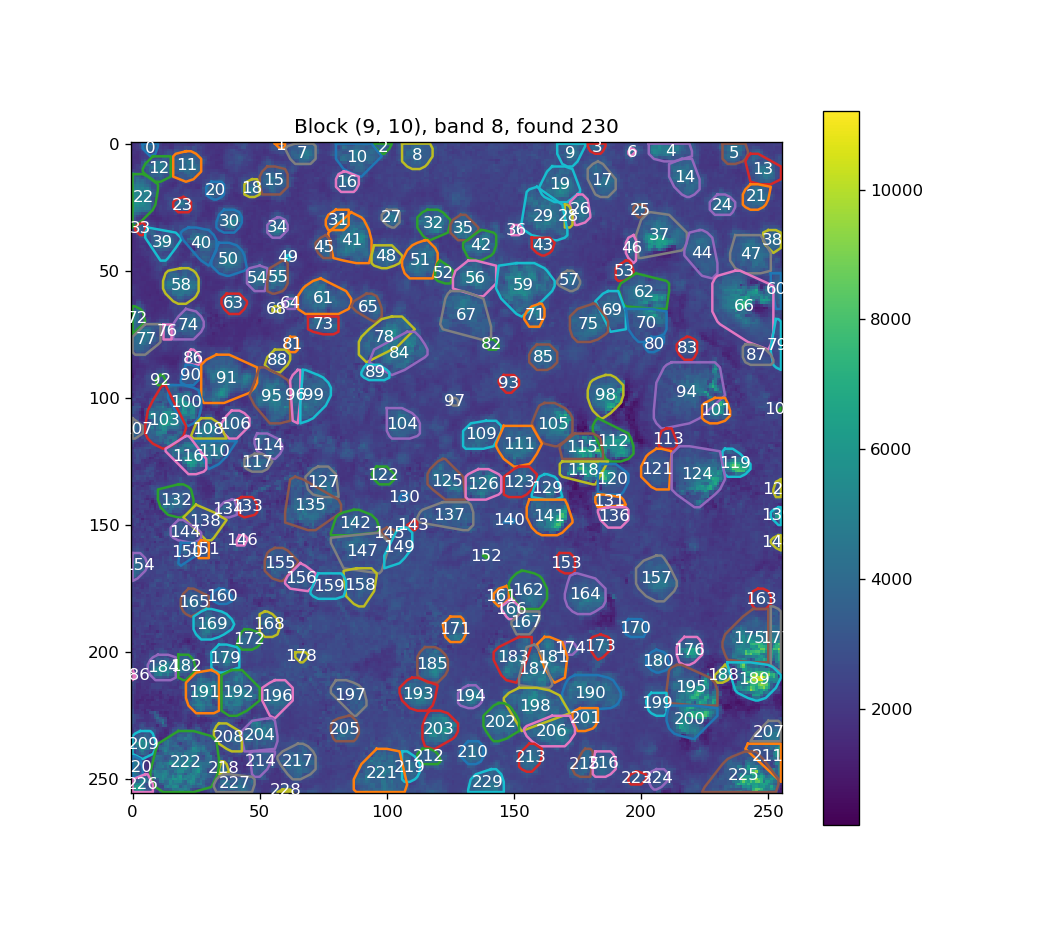

In [46]:
plot_block_polys((9,10),polys)

In [45]:
sum([len(poly) for block, poly in polys.items()])

69211

## Save all polygons to shapefile

In [59]:
import fiona

shape_file = '../test_shape/my_shp_all.shp'

In [58]:

    print(len(src.block_shapes))

18


In [61]:
with rasterio.open(dataset_VIS_filename) as dataset:
    affine_matrix = [dataset.transform.a,
                     dataset.transform.b,
                     dataset.transform.d,
                     dataset.transform.e,
                     dataset.transform.c,
                     dataset.transform.f]


schema = {'geometry': 'Polygon', 'properties': {'id': 'int'},}

with fiona.open(shape_file, 'w', 'ESRI Shapefile', schema, dataset.crs) as c:
    for block, polys in polys.items():
        polys_t = translate(polys,xoff=256*block[1],yoff=256*block[0])
        polys_tt = affine_transform(polys_t,affine_matrix)
        
        for i, poly_tt in enumerate(polys_tt):
            c.write({'geometry': mapping(poly_tt),'properties': {'id': i},})

# Watershed ITCD

In [7]:
from thresholding_watershed import itcd as itcd_tw
#from local_maxima import itcd as itcd_lm
from skimage.color import gray2rgb

from skimage.exposure import rescale_intensity

from rasterio.mask import mask
from shapely.affinity import translate,affine_transform
from shapely.geometry import mapping

In [8]:
selected_band = 8

trees_mono = trees_VIS[selected_band]

# Scale image
trees_mono_n = rescale_intensity(trees_mono,out_range='uint8')

In [9]:
# Compute ITCD
polys = itcd_tw(trees_mono_n, smoothing=2, rgb=False, n_dilation=0)

MemoryError: 